# Disciplina Tópicos Especiais II (C318)

###### Curso: Fundamentos de Machine Learning
###### Alunas: Marines Ribeiro Lopes, Rafaela de Moraes Papale
###### Professor: Ricardo Augusto

Projeto ML (Machine Learning) - Análise e Modelagem - Dataframe: survey lung cancer

-------------------------------------------------------------------------------------------------------------------------------

##### Objetivo: Prever se um paciente tem câncer de pulmão ou possui tendência a ter essa doença com bases em alguns dados coletados do sistema online de previsão de câncer de pulmão do site.

##### Regras de Negócio:

- É possível prever que uma pessoa possa possuir cancer de pulmão com base em dados médicos de forma automatizada, sem supervisão profissional?

- Qual é o principal sintoma do câncer de pulmão?

- Qual a principal doença recorrente em quem tem cancer de pulmão?

- Existe uma tendência maior em algum gênero ou faixa etária?

##### Tipo de problema: Classificação Binária

##### Enquadramento:
Aprendizagem supervisionada, pois a saída é conhecida.

-------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Instalação da lib SMOTE para balanceamento do dataframe / Instação da lib klib para plot de gráficos
!pip install klib
!pip install smote

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importação de bibliotecas utilizadas no projeto

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

## Importação da base de dados

In [3]:
df = pd.read_csv('survey lung cancer.csv')

In [4]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [5]:
# Informações sobre o dataframe (atributo info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

## Informações sobre o dataset:

Contexto: 
A eficácia do sistema de previsão de câncer ajuda as pessoas a conhecer seu risco de câncer com baixo custo e também ajuda as pessoas a tomar a decisão apropriada com base em seu status de risco de câncer. Os dados são coletados do sistema online de previsão de câncer de pulmão.

Atributos:

| Atributo | Descrição | Valores |
|--- |--- |--- |
|Gender| Gênero | M(male)/F(female)|
|Age| Faixa etária abordada na pesquisa |Age of the patient|
|Smoking| Indica se é fumante |YES=2/NO=1|
|Yellow fingers| Dedos amarelos |YES=2/NO=1|
|Anxiety| Ansiedade |YES=2/NO=1|
|Peer_pressure| Pressão dos paes, termo usado para indicar o ato de fazer algo por causa da pressão de outros|YES=2/NO=1|
|Chronic Disease| Doença crônica |YES=2/NO=1|
|Fatigue| Fadiga |YES=2/NO=1|
|Allergy| Alergia |YES=2/NO=1|
|Wheezing|Termo médico que faz referência ao sitoma de chiado no peito |YES=2/NO=1|
|Alcohol| Indica se o indivíduo ingere alcool|YES=2/NO=1|
|Coughing| Tosse |YES=2/NO=1|
|Shortness of Breath|Falta de ar |YES=2/NO=1|
|Swallowing Difficulty|Dificuldade para engolir |YES=2/NO=1|
|Chest pain| Dor no peito |YES=2/NO=1|
|Lung Cancer| Indica se o individuo tem câncer de pulmão ou não |YES/NO|

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Observações:
- Média de idade das pessoas que participaram da pesquisa é igual a 63 anos.
- A idade mínima de um paciente foi 21 anos
- A idade máxima de um paciente foi 87 anos
- 25% da população analisada possui 57 anos
- 75% da população analisada possui 69 anos

## Verificando dados duplicados

In [7]:
df.duplicated().sum()

33

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(276, 16)

## Preparação dos Dados - Manipulando features categóricas (ordinal encoder)

Com exceção da variável idade ('AGE'), todas outras são variáveis categóricas.
Portanto, os valores YES/NO, M/F foram convertidos para 1 e 0.

YES = 1
NO = 0
M = 1
F = 0

In [10]:
df = df.replace(['M','F',1,2,'YES','NO'],(1,0,0,1,1,0))
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


## Obtendo informações sobre o dataframe

É imprescindível analisar a variável target a fim de validar se o classificador não tende a ficar inclinado a uma resposta específica. Nesse caso, podemos perceber que o dataframe encontra-se desbalanceado para o lado positivo da doença.

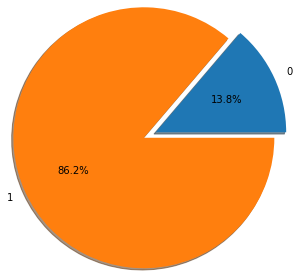

In [11]:
r = df.groupby('LUNG_CANCER')['LUNG_CANCER'].count()
plt.pie(r, explode=[0.05, 0.1], labels=[0, 1], radius=1.5, autopct='%1.1f%%',  shadow=True);

In [12]:
df["LUNG_CANCER"].value_counts()

1    238
0     38
Name: LUNG_CANCER, dtype: int64

Levantando variações de resultados das variáveis categóricas:

In [13]:
# Verificando as variáveis categóricas - YES: 1, NO: 0
gender = df["GENDER"].value_counts()
print(gender)
print('----------------------------')
smoking = df["SMOKING"].value_counts()
print(smoking)
print('----------------------------')
yellow_fingers = df["YELLOW_FINGERS"].value_counts()
print(yellow_fingers)
print('----------------------------')
anxiety = df["ANXIETY"].value_counts()
print(anxiety)
print('----------------------------')
peer_pressure = df["PEER_PRESSURE"].value_counts()
print(peer_pressure)
print('----------------------------')
chronic_disease = df["CHRONIC DISEASE"].value_counts()
print(chronic_disease)
print('----------------------------')
fatigue = df["FATIGUE "].value_counts()
print(fatigue)
print('----------------------------')
allergy = df["ALLERGY "].value_counts()
print(allergy)
print('----------------------------')
wheezing = df["WHEEZING"].value_counts()
print(wheezing)
print('----------------------------')
alcohol_consuming = df["ALCOHOL CONSUMING"].value_counts()
print(alcohol_consuming)
print('----------------------------')
coughing = df["COUGHING"].value_counts()
print(coughing)
print('----------------------------')
shortness_of_breath = df["SHORTNESS OF BREATH"].value_counts()
print(shortness_of_breath)
print('----------------------------')
swallowing_difficulty = df["SWALLOWING DIFFICULTY"].value_counts()
print(swallowing_difficulty)
print('----------------------------')
chest_pain = df["CHEST PAIN"].value_counts()
print(chest_pain)
print('----------------------------')

1    142
0    134
Name: GENDER, dtype: int64
----------------------------
1    150
0    126
Name: SMOKING, dtype: int64
----------------------------
1    159
0    117
Name: YELLOW_FINGERS, dtype: int64
----------------------------
0    139
1    137
Name: ANXIETY, dtype: int64
----------------------------
1    140
0    136
Name: PEER_PRESSURE, dtype: int64
----------------------------
1    144
0    132
Name: CHRONIC DISEASE, dtype: int64
----------------------------
1    183
0     93
Name: FATIGUE , dtype: int64
----------------------------
1    151
0    125
Name: ALLERGY , dtype: int64
----------------------------
1    151
0    125
Name: WHEEZING, dtype: int64
----------------------------
1    152
0    124
Name: ALCOHOL CONSUMING, dtype: int64
----------------------------
1    159
0    117
Name: COUGHING, dtype: int64
----------------------------
1    174
0    102
Name: SHORTNESS OF BREATH, dtype: int64
----------------------------
0    147
1    129
Name: SWALLOWING DIFFICULTY, dtype: 

## Análise exploratória de dados

Plotando histograma da variável idade em cima de uma amostra da população total:

In [14]:
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

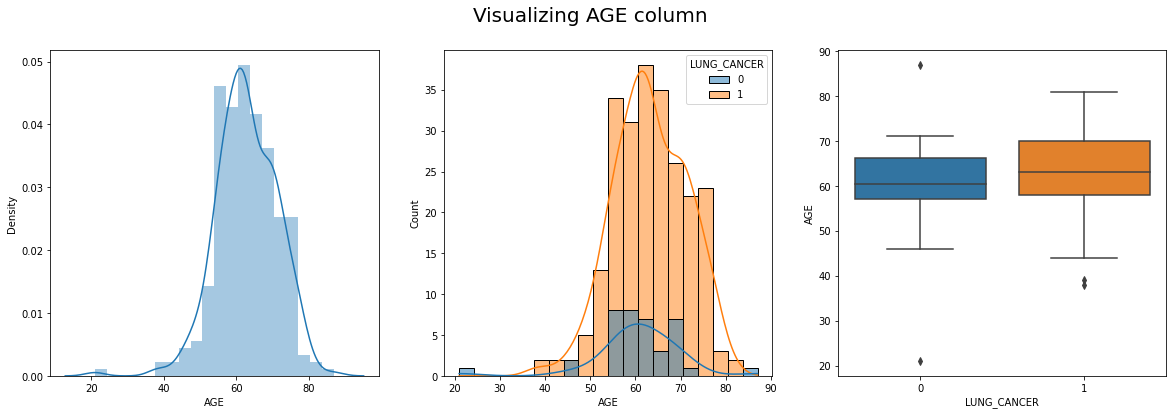

In [15]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

É apresentada uma estimativa empírica (em cima da amostra), a fim de apresentar a variação da quantidade de pessoas presentes de acordo com a idade de cada uma.

Agora utilizando a biblioteca Klib, podemos mostrar a Densidade de Probabilidade da População e sair de uma estimativa empírica:

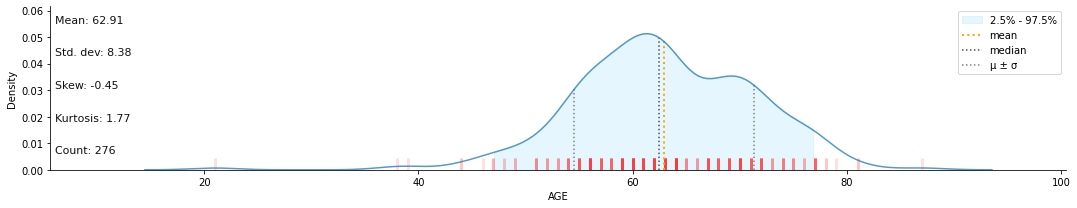

In [16]:
#Dispersão da variável Age
klib.dist_plot(df['AGE'])

É possivel a partir disso:
- Realizar inferências estatísticas
- Verificar o quão assimétrico estão os dados (skew)
- Verificar o quão achatada se encontra a distribuição (Kurtosis)
- Verificar a média de idade

Ainda podemos estender a análise da densidade de probabilidade para apenas quem possui câncer de pulmão:

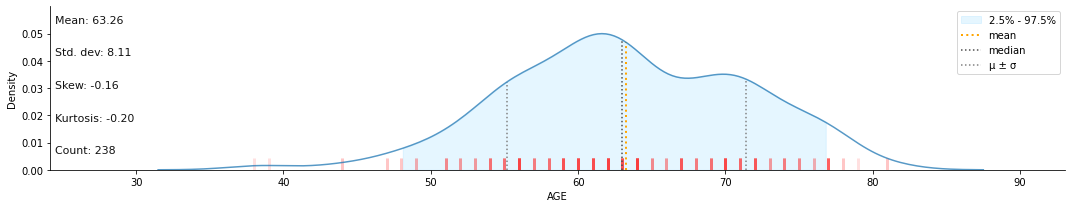

In [17]:
#Dispersão da variável Age, para pessoas que possuem câncer
df_positive = df[(df['LUNG_CANCER']==1)]
klib.dist_plot(df_positive['AGE'])

 - A média de idade das pessoas que possuem cãncer de pulmão é de 63 anos
 - 238 pessoas possuem essa condição

Para as pessoas que não possuem câncer de pulmão:

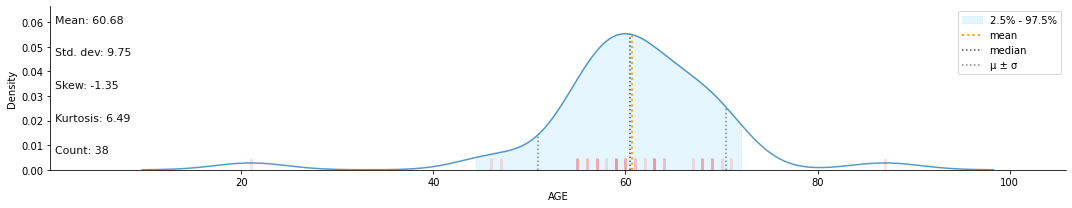

In [18]:
#Dispersão da variável Age, para pessoas que não possuem câncer
df_negative = df[(df['LUNG_CANCER']==0)]
klib.dist_plot(df_negative['AGE'])

- A média de idade das pessoas que não possuem câncer de pulmão é de 61 anos.
- 38 pessoas não apresentam a doença

## Investigando Correlações

Será analisado o dataframe de treino. Objetivo de conhecer o dados e detectar as melhores variáveis para se trabalhar.

Para realizar a análise exploratória dos dados foi utilizado o coeficiente de correlação de Pearson (p).

Esse coeficiente de correlação assume valores de -1 a 1, medindo apenas correlações lineares. 

Quando o coeficiente está próximo de 1, significa que existe uma forte correlação positiva. 

Quando o coeficiente está próximo de -1, significa que existe uma forte correlação negativa. 

Finalmente, coeficientes próximos de 0 significam que não há correlação linear.

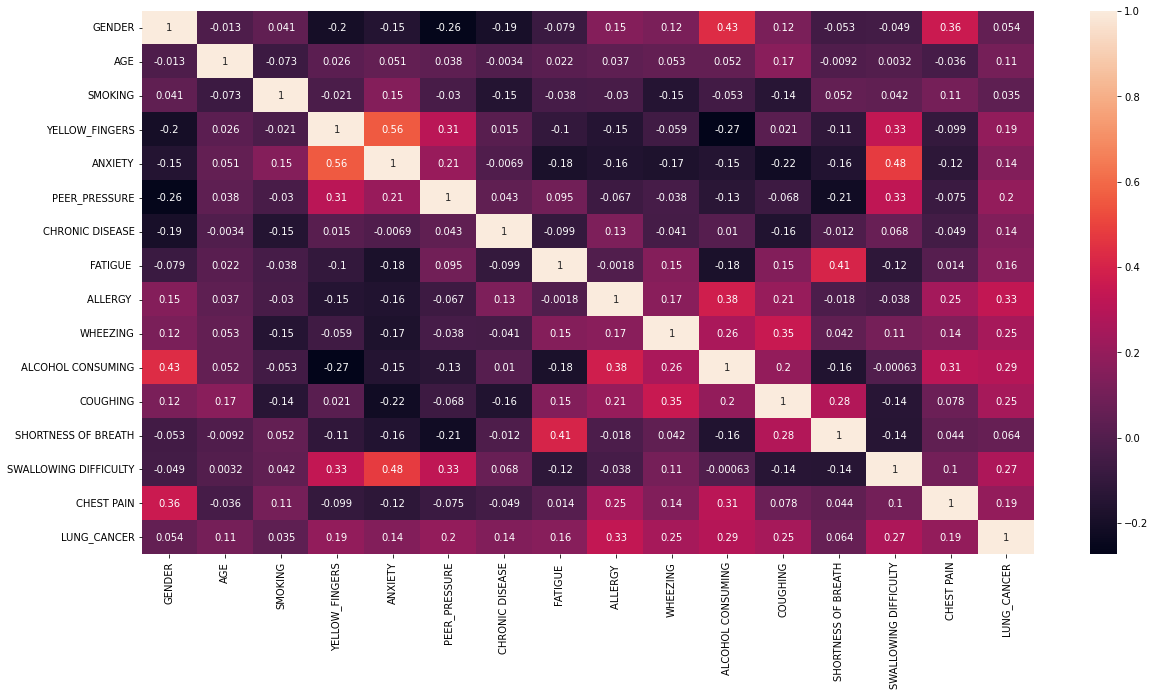

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

## Amostragem 

A amostragem é um ponto crítico para um projeto de ML. Ela afeta diretamente na generalização do modelo que será construído.

Essa etapa consiste em separar o conjunto de dados de treino e teste.

Dados de treinamento: são usados para treinar o modelo.

Dados de teste: são usados para comprovar que aquele modelo realmente funciona. (Serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho do modelo seja verificado.)

O método de amostragem empregada nesse projeto foi a amostragem aleatória simples, usando a função do SciKit Learn train_test_split.
Assim, 20% do conjunto de dados foram reservados para teste e o restante para treino. Essa seleção é feita de forma aleatória, mas com a semente do gerador de número aleatório com o valor em 42 (um valor fixo escolhido pela equipe). De forma que ao executar o código novamente, os conjuntos permaneçam os mesmos.

In [20]:
# Método de Amostragem Aleatória Simples (Sklearn)
# Função do scikit-learn train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

X_train = train_set.iloc[:, 0:15].to_numpy()

y_train = train_set.loc[:, 'LUNG_CANCER'].to_numpy()

# Balanceamento dos dados devido a quantidade de dados presentes no dataset e ao fato de que o mesmo tende para o lado positivo
sm = SMOTE(random_state=500)
X_train, y_train = sm.fit_resample(X_train, y_train)

## Modelagem 



Um classificador random forest pode ser utilizado para computar a importância das features.

Random Forest é um algoritmo de aprendizado de máquina popular que pertence à técnica de aprendizado supervisionado. Ele pode ser usado para problemas de Classificação e Regressão em ML. É baseado no conceito de ensemble learning, que é um processo de combinação de vários classificadores para resolver um problema complexo e melhorar o desempenho do modelo.

In [21]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
model = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 100)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4)

RandomForestClassifier é um estimador que ajusta vários classificadores de árvore de decisão em várias sub amostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste de controle. 

As vantagens de se usar esse método: são consideradas um método altamente preciso e robusto devido ao número de árvores de decisão que participam do processo, não sofre do problema de overfitting, o algoritmo pode ser usado em problemas de classificação e regressão.

In [22]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

In [23]:
importances

array([0.00290272, 0.00650711, 0.00730685, 0.06218126, 0.01683307,
       0.07943058, 0.1227791 , 0.0241639 , 0.16724269, 0.04628929,
       0.15198712, 0.16504742, 0.01096812, 0.08122258, 0.0551382 ])

In [24]:
ts = train_set
ts = ts.drop(columns=['LUNG_CANCER'])

In [25]:
#X_test
X_test = test_set.iloc[:, 0:15].to_numpy()
#Y_test
y_test = test_set.loc[:, 'LUNG_CANCER'].to_numpy()
#Train the model using the training sets  
y_pred=model.predict(X_test)

## Avaliação de Desempenho

A Confusion Matrix trata de uma tabela onde conseguimos identificar os tipos de classificação do modelo de classificação binário. 
Com ela, nós conseguimos facilmente calcular valores como acurácia, especificidade, sensibilidade, etc.

In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [27]:
confusion_matrix(y_test, y_pred)

array([[ 9,  3],
       [ 1, 43]])

Os verdadeiros negativos (tn) são observações cujo valor real é positivo e o valor previsto também, ou seja, o modelo acertou.

In [28]:
tn

9

Os falsos positivos (fp) são casos em que o resultado correto é negativo, mas o resultado obtido é positivo, então o modelo errou.

In [29]:
fp

3

Os falsos negativos (fn) são casos em que o resultado correto é positivo, mas o resultado obtido é negativo, então o modelo também errou.

In [30]:
fn

1

Os verdadeiros positivos que são observações cujo valor real é positivo e o valor previsto é positivo, ou seja, o modelo acertou.

In [31]:
tp

43

Para analisarmos o quão bem o modelo está fazendo as classificações vamos utilizar as métricas de avaliação: Acurácia, Sensibilidade e Especificidade.

In [32]:
total = tn + fp + fn + tp
accuracy = (tn + tp) / total

accuracy

0.9285714285714286

In [33]:
recall = tp / (tp + fn)

recall

0.9772727272727273

In [34]:
specificity = tn / (tn + fp)

specificity

0.75

Usando o classification_report para fazer um resumo das avaliações de desempenho do modelo.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56

